# Proyecto 3 de oprimización

## Optimización de la relación agua-cemento para garantizar un concreto de buena resistencia.

### 2 diciembre 2024

### Mauricio López Coronado

![ITESO](itesoo.png)

### Introducción:

El concreto es uno de los materiales más utilizados en la construcción debido a su versatilidad, durabilidad y capacidad para soportar grandes cargas. Su resistencia, sin embargo, depende en gran medida de la proporción y calidad de sus componentes: cemento, agua, agregados finos (arena) y agregados gruesos (grava). El cuidado en las proporciones de los agregados es esencial, ya que estos no solo constituyen la mayor parte del volumen del concreto, sino que también influyen directamente en sus propiedades mecánicas y de durabilidad.

Un diseño adecuado de mezcla garantiza que los agregados estén distribuidos de manera uniforme y que interactúen correctamente con el cemento y el agua para formar una matriz sólida. Si las proporciones no son las adecuadas, pueden surgir problemas como reducción en la resistencia, aumento de la porosidad, fisuras prematuras, y una menor durabilidad del concreto frente a agentes externos como la humedad y las cargas cíclicas. Por ello, un control preciso en la selección y dosificación de los agregados es fundamental para obtener un concreto que cumpla con los requisitos estructurales y de seguridad.

Además, optimizar las proporciones de los agregados no solo mejora las propiedades del concreto, sino que también tiene un impacto económico y ambiental, al minimizar el uso excesivo de cemento y reducir los costos asociados a la construcción. Por tanto, comprender y aplicar los principios de diseño de mezclas de concreto es una práctica esencial para cualquier proyecto de construcción que busque calidad, seguridad y sostenibilidad.

### Marco teórico 


La relación agua-cemento es el resultado de la división entre la cantidad de agua y la cantidad de cemento utilizada en una mezcla de concreto.
 
Los valores típicos y más comunes de esta relación suelen estar en el rango de 0.40 a 0.60. (AcademiaLab, 2024)

Este parámetro es uno de los factores clave, si no el más importante, que influye en la calidad y las propiedades del concreto endurecido. Esto se debe a que afecta directamente la porosidad del material; un concreto de buena calidad debe ser lo más compacto y denso posible. Por esta razón, es fundamental usar la menor cantidad de agua posible para mantener estas propiedades, siempre asegurando que haya suficiente agua para hidratar los componentes del cemento y permitir un manejo adecuado de la mezcla.

Una relación agua-cemento más baja genera un concreto más resistente y duradero, aunque puede dificultar su trabajabilidad, este problema puede solucionarse añadiendo aditivos como plastificantes.
Por otro lado, una proporción más alta produce una mezcla demasiado fluida, lo que deriva en un concreto endurecido más poroso y de baja calidad.

### Objetivo:

Optimizar la relación agua-cemento para con ello poder llevar a cabo un concreto de buena resistencia.

### Objetivos específicos:

Mediante una simulación, encontrar la resistenica del concreto óptima tomando en cuenta la relación agua cemento.

Tomar en cuenta el límite inferior y superior de la relación agua cemento, para que el concreto diseñado, cumpla con esas características

Demostrar la pérdida de resistencia tomando en cuenta la relación AC.

### Descripción del modelo

La resistencia del concreto, se puede calcular de la siguiente manera:
$$ R(x) = a - b*x $$

En donde la a es la resistencia ideal, y la b es el factor de reducción por exceso de agua.

Como se puede ver, no es una función convexa por lo que se puede transformar a una de la siguiente manera:
$$ R(x) = a - b*x + c*sin(d*x) $$

En donde la c sería la amplitud de la oscilación y la d la frecuencia de esta.

Las únicas restricciones del proyecto es los límites de la relación agua cemento, los cuáles son los siguientes:

$$ .40  <  x   < .60 $$

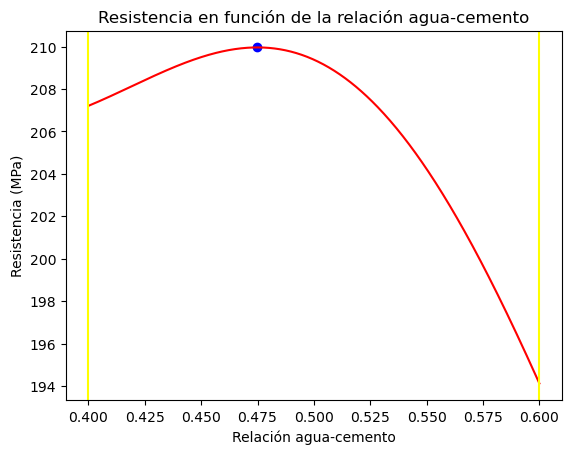

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

a = 250 # Resistencia base en MPa  
b = 100  # Coeficiente de reducción lineal de resistencia por exceso de agua
c = 10 # Amplitud de la componente oscilatoria 
d = 15 # Frecuencia de la componente oscilatoria 
x_min = 0.40  # Relación agua-cemento mínima 
x_max = 0.60  # Relación agua-cemento máxima permitida


def resistencia(x):
    return a-b*x+c*np.sin(d*x)

x_valor = np.linspace(x_min, x_max, 500)

y_valor = resistencia(x_valor)

puntoscriticos = []
for i in range(1, len(x_valor) - 1): #encuentra max y min de los y valor en el rango de los valores de x
    if (y_valor[i] > y_valor[i - 1] and y_valor[i] > y_valor[i + 1]) or \
       (y_valor[i] < y_valor[i - 1] and y_valor[i] < y_valor[i + 1]):
        puntoscriticos.append((x_valor[i], y_valor[i]))

plt.plot(x_valor, y_valor, color="red")
criticox = [pt[0] for pt in puntoscriticos]
criticoy = [pt[1] for pt in puntoscriticos]
plt.scatter(criticox, criticoy, color="blue")
plt.title("Resistencia en función de la relación agua-cemento")
plt.xlabel("Relación agua-cemento")
plt.ylabel("Resistencia (MPa)")
plt.axvline(x_min, color="yellow")  #limite inferior de la relación AC
plt.axvline(x_max, color="yellow") #limite superior de la relación AC



In [96]:
def resistenciamax(x):
    return -(a - b * x[0] + c * np.sin(d * x[0])) #se vuelve negativa ya que se busca obtener la resistenica max

# Restricciones del problema
# Asegurar que la relación agua-cemento esté dentro de los límites definidos
constraints = [
    {'type': 'ineq', 'fun': lambda x: x[0] - x_min},  # x >= x_min
    {'type': 'ineq', 'fun': lambda x: x_max - x[0]}   # x <= x_max
]

# Punto inicial para el proceso de optimización
x0 = [0.40]  # Valor inicial, primer punto del intervalo

res = minimize(resistenciamax, x0, constraints=constraints, bounds=[(x_min, x_max)])

if res.success:
    RAC = res.x[0]  # Relación agua-cemento óptima encontrada
    resistencia = -(resistenciamax([RAC]))  # Resistencia máxima calculada
    print(f"Relación agua-cemento óptima: {RAC:.2f}")
    print(f"Resistencia máxima alcanzada: {resistencia:.2f} MPa")
else:
    print("No se encontró una solución óptima.")

Relación agua-cemento óptima: 0.47
Resistencia máxima alcanzada: 209.96 MPa


### Conclusión

Como se observa en la gráfica, la curva alcanza un punto máximo antes de comenzar a descender nuevamente, lo que indica el valor donde el concreto alcanza su resistencia más alta. Este máximo se obtiene mediante la simulación, logrando determinar que la relación agua-cemento óptima es de 0.47. Partiendo de una resistencia base de 250 MPa, el cálculo aplicado al factor de reducción dio como resultado una resistencia de 209.96 MPa. Esto resalta que, incluso utilizando la relación óptima, el concreto experimenta una pérdida de resistencia debido a la interacción entre sus componentes.

Este análisis no solo es útil para identificar la relación agua-cemento adecuada, sino también para prever la reducción esperada en la resistencia al diseñar una mezcla de concreto. De este modo, se puede ajustar la resistencia objetivo inicial para garantizar que el concreto cumpla con las especificaciones requeridas después de aplicar el factor de reducción. Asimismo, este enfoque podría extenderse para considerar otras propiedades esenciales, como la trabajabilidad y la durabilidad, optimizando así el diseño del concreto para aplicaciones específicas.

### Bibliografía

Relación agua-cemento _ AcademiaLab. (2024). https://academia-lab.com/enciclopedia/relacion-agua-cemento/
Ing Soto U. Tecnología del concreto, Universidad Iberoamericana León, (2024)